In [15]:
# a) Which variant will have the most daily active users after 15 days? 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def retention_curve(d1, d3, d7, d14, maximum=30):
    # Calculating retention points with log-linear interpolation for not known days (From D0 to D14) 
    known_days = np.array([0,1,3,7,14])
    reten_rates = ([1.0, d1, d3, d7, d14])
    reten_days = np.arange(0, maximum + 1)
    log_reten_known = np.log(reten_rates)
    log_reten_days = np.interp(reten_days, known_days, log_reten_known)
    reten_back  = np.exp(log_reten_days)
    
    # After D14 
    slope = (np.log(d14) - np.log(d7)) / 7
    for day in range(15, maximum + 1):
        reten_back[day] = np.exp(np.log(d14) + slope * (day - 14))
    
    return pd.Series(reten_back, index=reten_days, name="retention")

The above function which is explained detailed in the "retention.curve.ipynb" at the src file, we use it for this question as generater the not known detention points. 

In [19]:
# Created A and B parameters to store up the both generated and known retention points.
A = retention_curve(0.53, 0.27, 0.17, 0.06, maximum=30)
B = retention_curve(0.48, 0.25, 0.19, 0.09, maximum=30)

# The assumption says that each variant recevies exactly 20000 install per day. So, we assign it to 'install' parameter.
installs = 20000

# These line of codes are the mathematical model. Every new day, there are 20000 installs + we have previous days' active players which is modeled as:
# DAU(t) = DAU(t-1) + 20000 . R(t)

A_dau_15 = installs * A.cumsum().loc[15] # we need the 15th day cumulative DAU so we filter with using .loc[] method from Pandas library.
B_dau_15 = installs * B.cumsum().loc[15]

print("After 15 Days daily active users on Variant A:\n", round(A_dau_15),"\n")
print("After 15 Days daily active users on Variant B:\n", round(B_dau_15))

After 15 Days daily active users on Variant A:
 74626 

After 15 Days daily active users on Variant B:
 77797


As we can see that after 15 days, there is more player returns the game in the Variant B. 

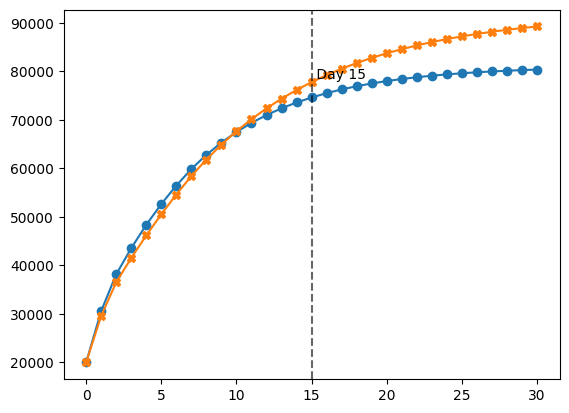

In [25]:
A_dau = installs * A.cumsum()
B_dau = installs * B.cumsum()

plt.plot(A_dau.index, A_dau.values, marker="o", label="Variant A")
plt.plot(B_dau.index, B_dau.values, marker="X", label="Variant B")

plt.axvline(15, linestyle="--", color="black", alpha=0.6)
plt.text(15, B_dau.loc[15], " Day 15", va="bottom", ha="left")
plt.show()

After 15 days, as we can see from the line graph, most dail active players would be in the Variant B.